### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

The Analysis provides insights to the National Health Services (NHS) operations. It focuses on the healtcare appointments across the UK and their determining factors.
The NHS incurs significant, potentially avoidable, costs when patients miss general practitioner (GP) appointments. The aim of the Analysis is to define reasons for missed appointments and better understand the big picture.

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

### 2. Read files

In [2]:
ad = pd.read_csv('actual_duration.csv')
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
ar = pd.read_csv('appointments_regional.csv')
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [4]:
nc = pd.read_csv('national_categories.csv')
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,02/08/2021,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [5]:
tweets = pd.read_csv('tweets.csv')
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en


### 3. Data check

#### Data type

In [6]:
ad.dtypes

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [7]:
ar.dtypes

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

In [8]:
nc.dtypes

appointment_date         object
icb_ons_code             object
sub_icb_location_name    object
service_setting          object
context_type             object
national_category        object
count_of_appointments     int64
appointment_month        object
dtype: object

#### Columns names

In [9]:
print(ad.columns)

Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


In [10]:
print(ar.columns)

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


In [11]:
print(nc.columns)

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


#### Missing values

In [12]:
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [13]:
ar.isnull().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [14]:
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

#### N/a values

In [15]:
ad.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [16]:
ar.isna().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [17]:
nc.isna().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

#### Descriptive statistics

In [18]:
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [19]:
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [20]:
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


#### Metadata

In [21]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [22]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [23]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   appointment_date       817394 non-null  object
 1   icb_ons_code           817394 non-null  object
 2   sub_icb_location_name  817394 non-null  object
 3   service_setting        817394 non-null  object
 4   context_type           817394 non-null  object
 5   national_category      817394 non-null  object
 6   count_of_appointments  817394 non-null  int64 
 7   appointment_month      817394 non-null  object
dtypes: int64(1), object(7)
memory usage: 49.9+ MB


### 4. Questions

**Question 1:** How many locations are there in the data set?

In [24]:
# There are 3 different divisions of location based on the 'ad' data frame.
print('Count of Sub-ICB location: ', ad['sub_icb_location_code'].nunique())
print('Count of ICB location: ', ad['icb_ons_code'].nunique())
print('Count of regions: ', ad['region_ons_code'].nunique())

Count of Sub-ICB location:  106
Count of ICB location:  42
Count of regions:  7


**Question 2:** What are the five locations with the highest number of records?

In [25]:
# We check locations from the lowest level of division
top_locations = ad.groupby('sub_icb_location_name')['count_of_appointments'].sum().sort_values(ascending=False)

# Top 5 locations are:
print(top_locations.head())

# Confirm a total number of locations
print('Total number of locations: ',len(ad['sub_icb_location_name'].value_counts()))

sub_icb_location_name
NHS North West London ICB - W2U3Z              6976986
NHS North East London ICB - A3A8R              5341883
NHS Kent and Medway ICB - 91Q                  5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V    4712737
NHS South East London ICB - 72Q                4360079
Name: count_of_appointments, dtype: int64
Total number of locations:  106


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [26]:
print('Count of service settings: ', nc['service_setting'].nunique())
print('Count of context types: ', nc['context_type'].nunique())
print('Count of national categories: ', nc['national_category'].nunique())
print('Count of appointment statuses: ', ar['appointment_status'].nunique())

Count of service settings:  5
Count of context types:  3
Count of national categories:  18
Count of appointment statuses:  3


**Information**

The data focuses strictly on NHS appointments in the UK and the appointments' characteristics. It presents information regarding location of the appointments, the date of appointment, its duration, type, mode, service setting, etc.

Each data table has a different length. The data type is object while the only integer is the count of appointments. There are no null or n/a values.

There are 3 divisions of locations: regions, ICB loctaion and Sub-ICB location. For the purpose of the analysis, the Sub-ICB location is studied further. There are 106 Sub-ICB locations. The most popular is NHS North West London ICB which recorded almost 7 million appointments over the period presented.

# 

# Assignment activity 3

**Question 1:** Between what dates were appointments scheduled? 

In [27]:
# Check of the data format of ad
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [28]:
# Check of the data format of nc
nc['appointment_date'].head()

0    02/08/2021
1    02/08/2021
2    02/08/2021
3    02/08/2021
4    02/08/2021
Name: appointment_date, dtype: object

In [29]:
from datetime import datetime

In [30]:
# ad['appointment_date'] data type is object. Change it to date
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')
ad['appointment_date'].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [31]:
# nc['appointment_date'] data type is object. Change it to date
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'], format='%d/%m/%Y')
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [32]:
ad_d_min = ad['appointment_date'].min().strftime("%d-%m-%Y")
ad_d_max = ad['appointment_date'].max().strftime("%d-%m-%Y")

print(f"The minimum date in ad data set is {ad_d_min}")
print(f"The maximum date in ad data set is {ad_d_max}")

The minimum date in ad data set is 01-12-2021
The maximum date in ad data set is 30-06-2022


In [33]:
nc_d_min = nc['appointment_date'].min().strftime("%d-%m-%Y")
nc_d_max = nc['appointment_date'].max().strftime("%d-%m-%Y")

print(f"The minimum date in nc data set is {nc_d_min}")
print(f"The maximum date in nc data set is {nc_d_max}")

The minimum date in nc data set is 01-08-2021
The maximum date in nc data set is 30-06-2022


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [34]:
# There are 5 unique service settings named:
nc['service_setting'].unique()

array(['Primary Care Network', 'Other', 'General Practice', 'Unmapped',
       'Extended Access Provision'], dtype=object)

In [35]:
nc_subset = nc[nc['appointment_date'].between('2022-1-1', '2022-6-1') 
               & (nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z')]
nc_subset.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
800289,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,496,2022-01
800290,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Clinical Triage,19,2022-01
800291,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
800292,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,16,2022-01
800293,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinics,29,2022-01


In [36]:
# Total count of appointments per service setting
ss_count = nc_subset.groupby('service_setting')\
                            ['count_of_appointments'].sum().sort_values(ascending=False)
ss_count

service_setting
General Practice             4804239
Unmapped                      391106
Other                         152897
Primary Care Network          109840
Extended Access Provision      98159
Name: count_of_appointments, dtype: int64

In [37]:
max_index = ss_count.idxmax()
max_value = ss_count.loc[max_index]

print(f"{max_index} was the most popoular service setting with the count of {max_value} appointments.")

General Practice was the most popoular service setting with the count of 4804239 appointments.


**Question 3:** Which month had the highest number of appointments?

In [38]:
d1 = nc.groupby([nc['appointment_date'].dt.year, 
                 nc['appointment_date'].dt.month])['count_of_appointments'].sum()

In [39]:
d1_sorted = d1.sort_values(ascending=False)

In [40]:
d1_sorted.head()

appointment_date  appointment_date
2021              11                  30405070
                  10                  30303834
2022              3                   29595038
2021              9                   28522501
2022              5                   27495508
Name: count_of_appointments, dtype: int64

In [41]:
d1_sorted.tail()

appointment_date  appointment_date
2022              1                   25635474
                  2                   25355260
2021              12                  25140776
2022              4                   23913060
2021              8                   23852171
Name: count_of_appointments, dtype: int64

In [42]:
max_index_2 = d1_sorted.idxmax()
max_value_2 = d1_sorted.loc[max_index_2]

print(f"In {max_index_2} there was the highest number of appointments - {max_value_2}.")

In (2021, 11) there was the highest number of appointments - 30405070.


**Question 4:** What was the total number of records per month?

In [43]:
d1

appointment_date  appointment_date
2021              8                   23852171
                  9                   28522501
                  10                  30303834
                  11                  30405070
                  12                  25140776
2022              1                   25635474
                  2                   25355260
                  3                   29595038
                  4                   23913060
                  5                   27495508
                  6                   25828078
Name: count_of_appointments, dtype: int64

**Information**

The data provided presents different time overview. Data with actual duration of appointments is collected from December 2021. The national categories data starts in August 2021. The data ends on 30th June 2022 in both of the tables. 

The column ['appointment_date'] required change of data type from 'object' to 'date' and unification with a use of .pd_to_datetime method. It allowed to indicate count of appointments per month. The month with highest number of appointments was 11.2021 - 30,405,070 appointments across the UK. The least appointments were recorded in 01.2022 - 25,635,474.

Service setting data was studied for the most popular location - NHS North West London ICB.  General Practice is by far the most popular service with around 4.8 million appointments recorded.

# 

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15, 12)})
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [45]:
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Aggregate on monthly level and determine the sum of records per month.
nc_grouped = nc.groupby('appointment_month')['count_of_appointments'].sum()
nc_grouped

appointment_month
2021-08    23852171
2021-09    28522501
2021-10    30303834
2021-11    30405070
2021-12    25140776
2022-01    25635474
2022-02    25355260
2022-03    29595038
2022-04    23913060
2022-05    27495508
2022-06    25828078
Name: count_of_appointments, dtype: int64

**Service settings:**

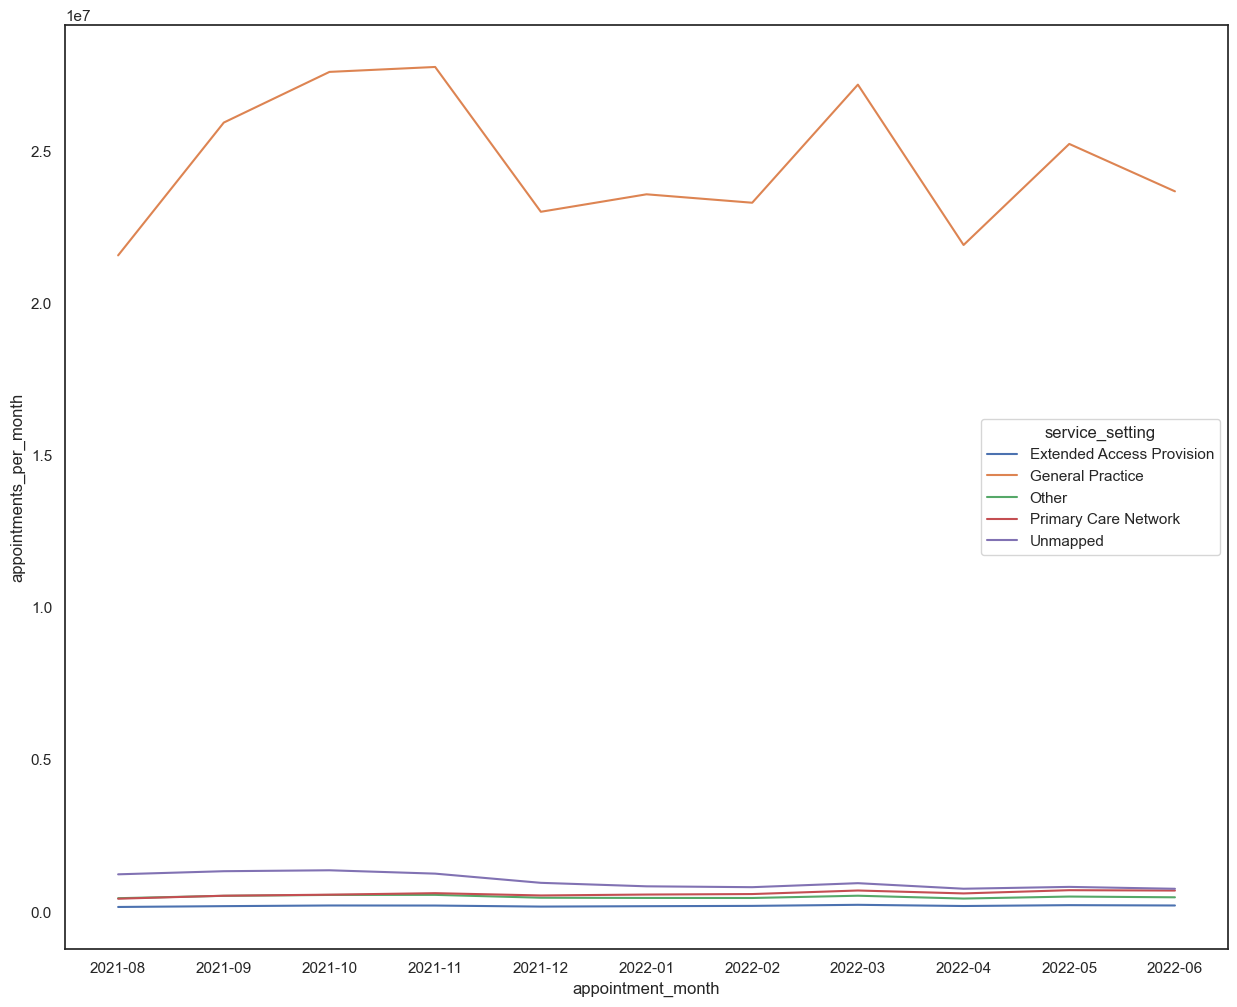

In [46]:
nc_ss = nc.groupby(['appointment_month', 'service_setting'])
sum_nc_ss = nc_ss['count_of_appointments'].sum().reset_index(name='appointments_per_month')

sns.lineplot(x='appointment_month', y='appointments_per_month', data=sum_nc_ss, hue='service_setting', ci=None)
plt.savefig('nc_ss.png', dpi=300)

**Context types:**

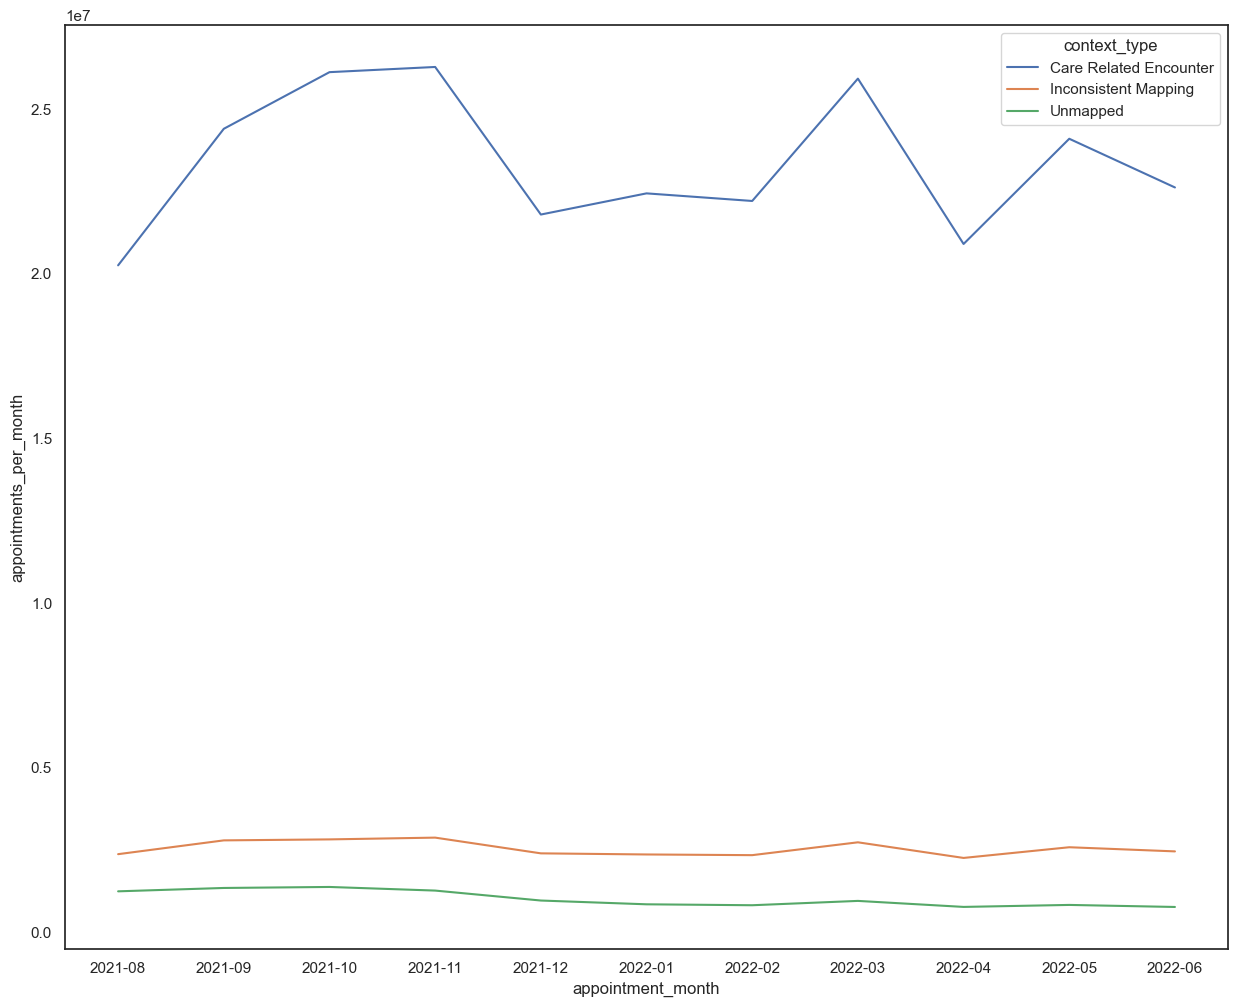

In [47]:
nc_ct = nc.groupby(['appointment_month', 'context_type'])
sum_nc_ct = nc_ct['count_of_appointments'].sum().reset_index(name='appointments_per_month')

sns.lineplot(x='appointment_month', y='appointments_per_month', data=sum_nc_ct, hue='context_type', ci=None)
plt.savefig('nc_ct.png', dpi=300)

**National categories:**

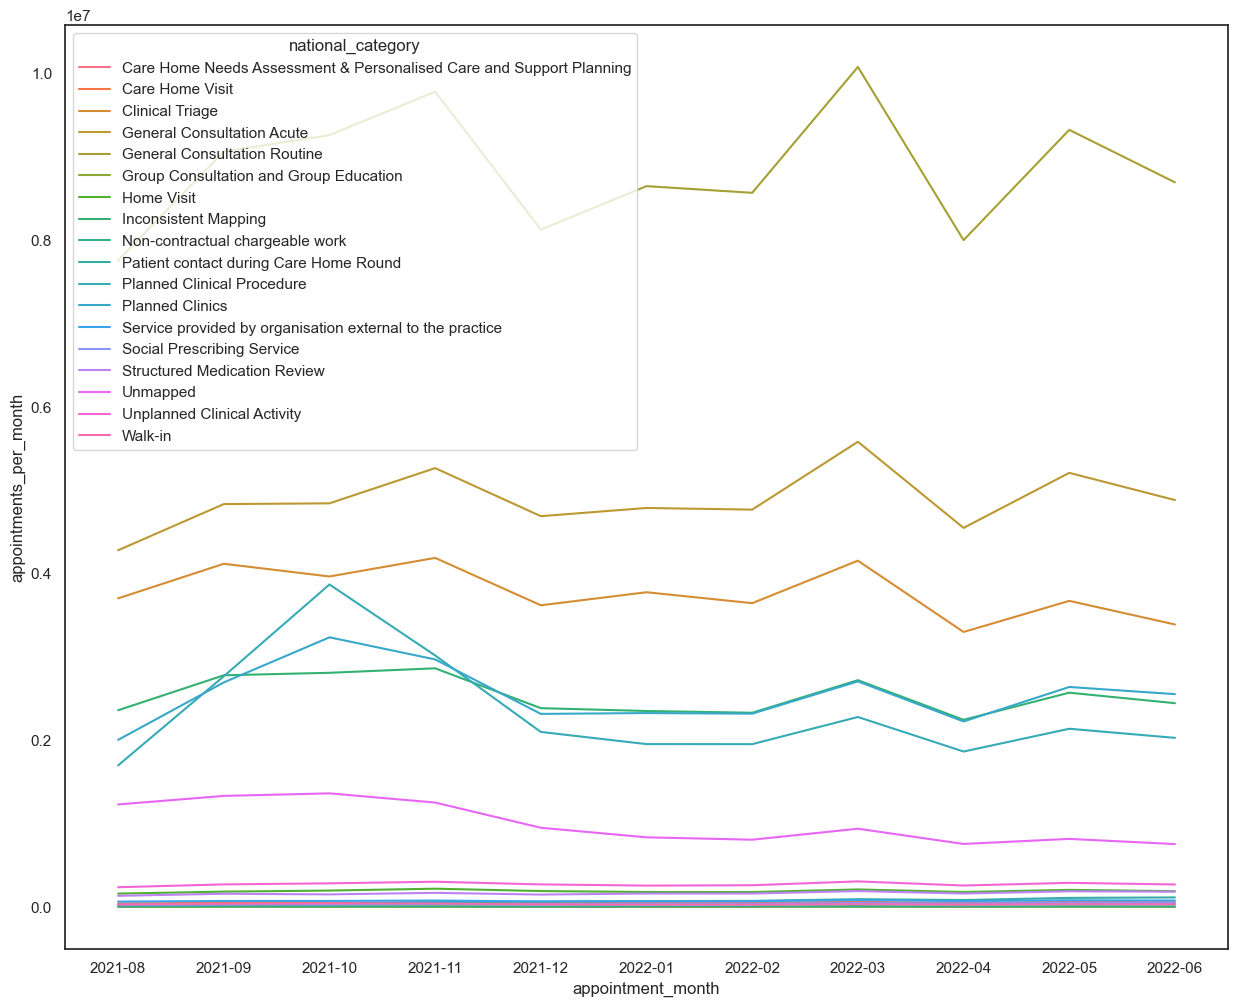

In [48]:
nc_nc = nc.groupby(['appointment_month', 'national_category'])
sum_nc_nc = nc_nc['count_of_appointments'].sum().reset_index(name='appointments_per_month')

sns.lineplot(x='appointment_month', y='appointments_per_month', data=sum_nc_nc, 
             hue='national_category', ci=None)
plt.savefig('nc_nc.png', dpi=300)

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

In [49]:
nc_ss_grouped = nc.groupby(['appointment_date', 'appointment_month', 'service_setting'])

nc_ss_day = nc_ss_grouped['count_of_appointments'].sum().reset_index(name='appointments_per_month')
nc_ss_day

,appointment_date,appointment_month,service_setting,appointments_per_month
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
...,...,...,...,...
1665,2022-06-30,2022-06,Extended Access Provision,9163
1666,2022-06-30,2022-06,General Practice,1124374
1667,2022-06-30,2022-06,Other,23115
1668,2022-06-30,2022-06,Primary Care Network,34774


**Summer (August 2021):**

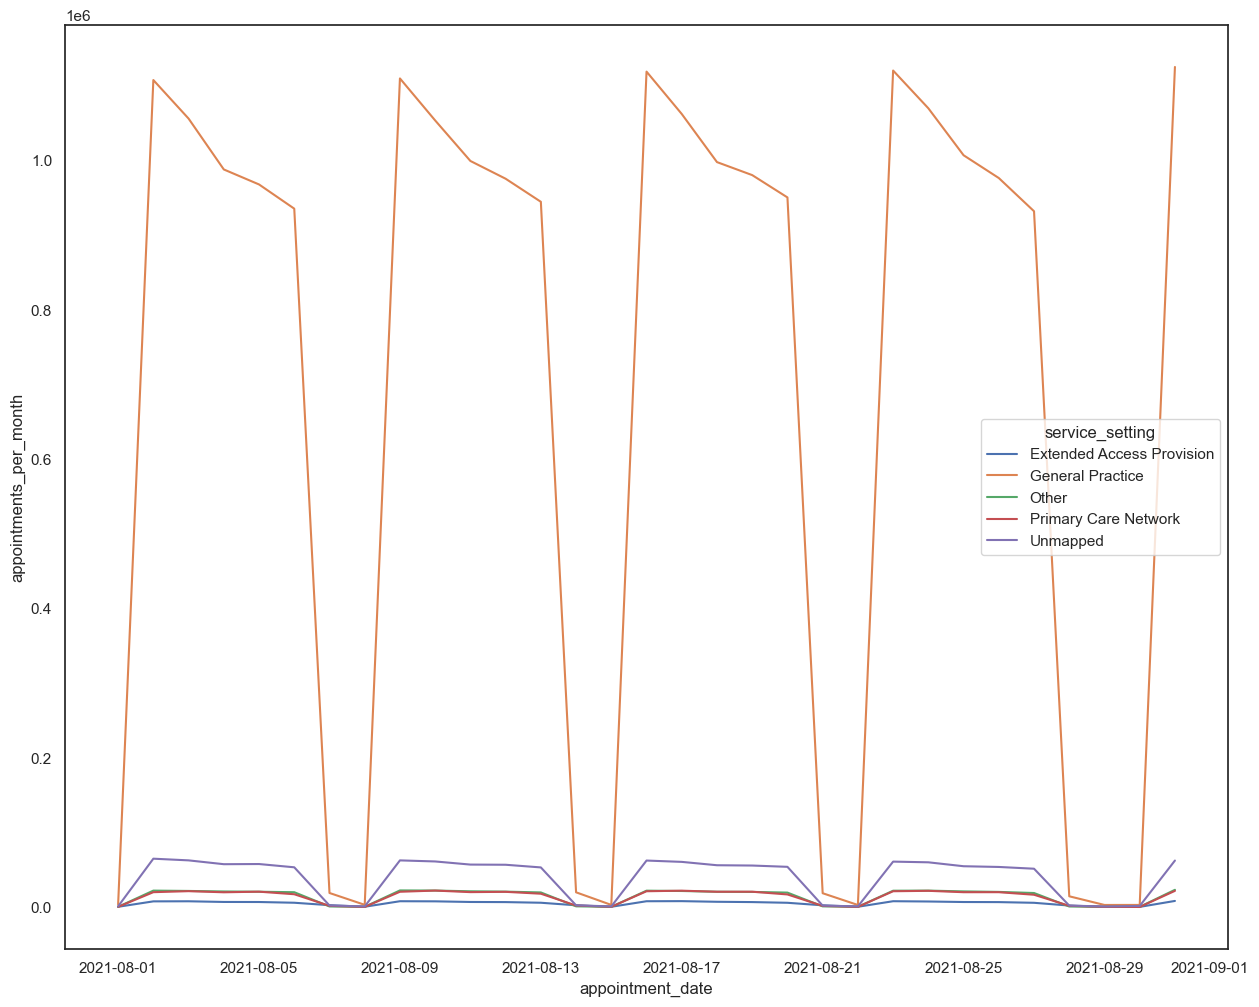

In [50]:
summer_ss = nc_ss_day[nc_ss_day['appointment_month'] == '2021-08']


sns.lineplot(x='appointment_date', y='appointments_per_month', 
                         hue='service_setting', data=summer_ss, ci=None)
plt.savefig('summer_ss.png', dpi=300)

**Autumn (October 2021):**

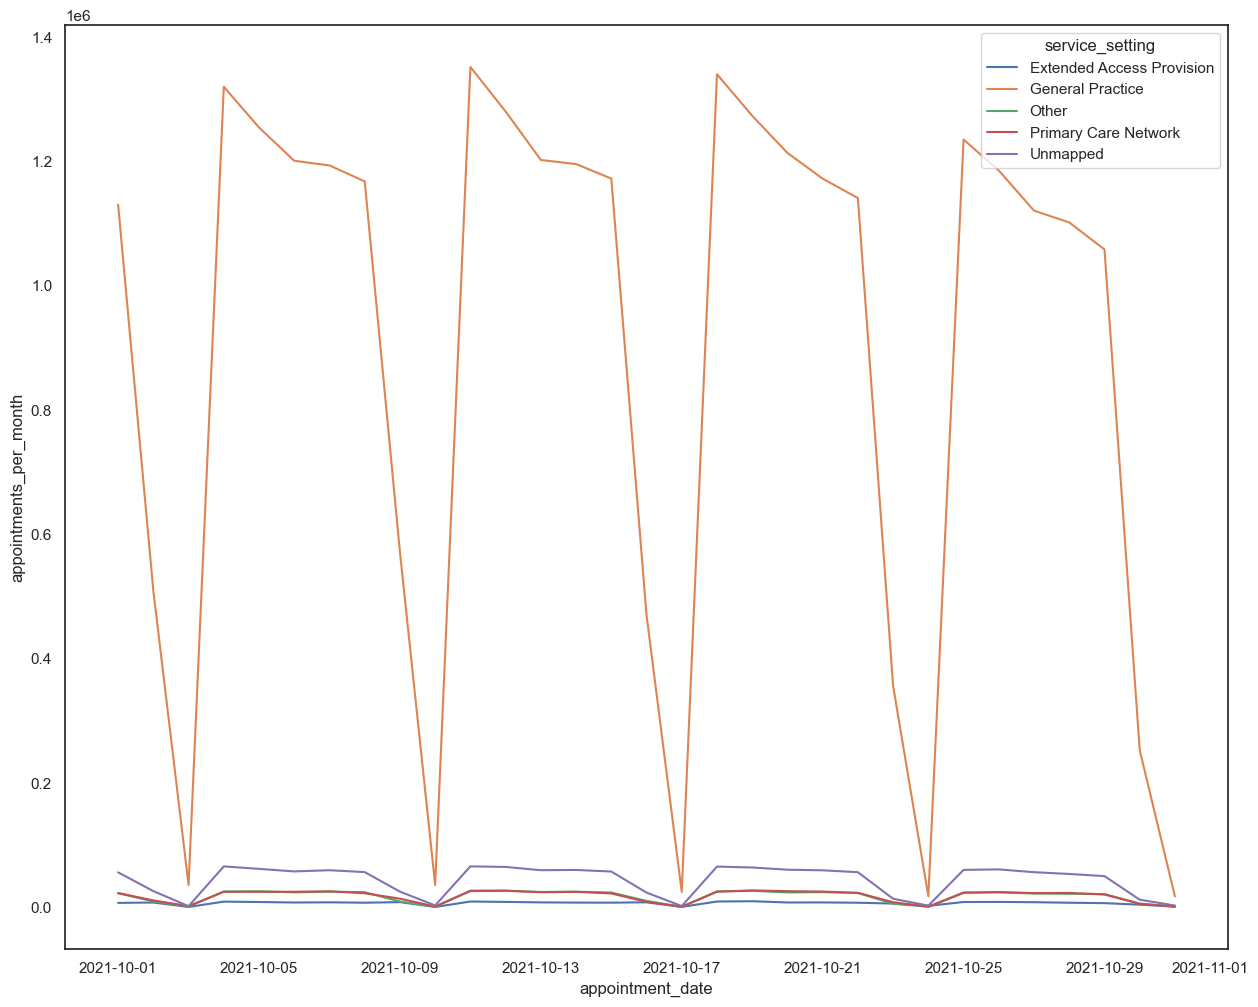

In [51]:
autumn_ss = nc_ss_day[nc_ss_day['appointment_month'] == '2021-10']


sns.lineplot(x='appointment_date', y='appointments_per_month', 
                         hue='service_setting', data=autumn_ss, ci=None)
plt.savefig('autumn_ss.png', dpi=300)

**Winter (January 2022):**

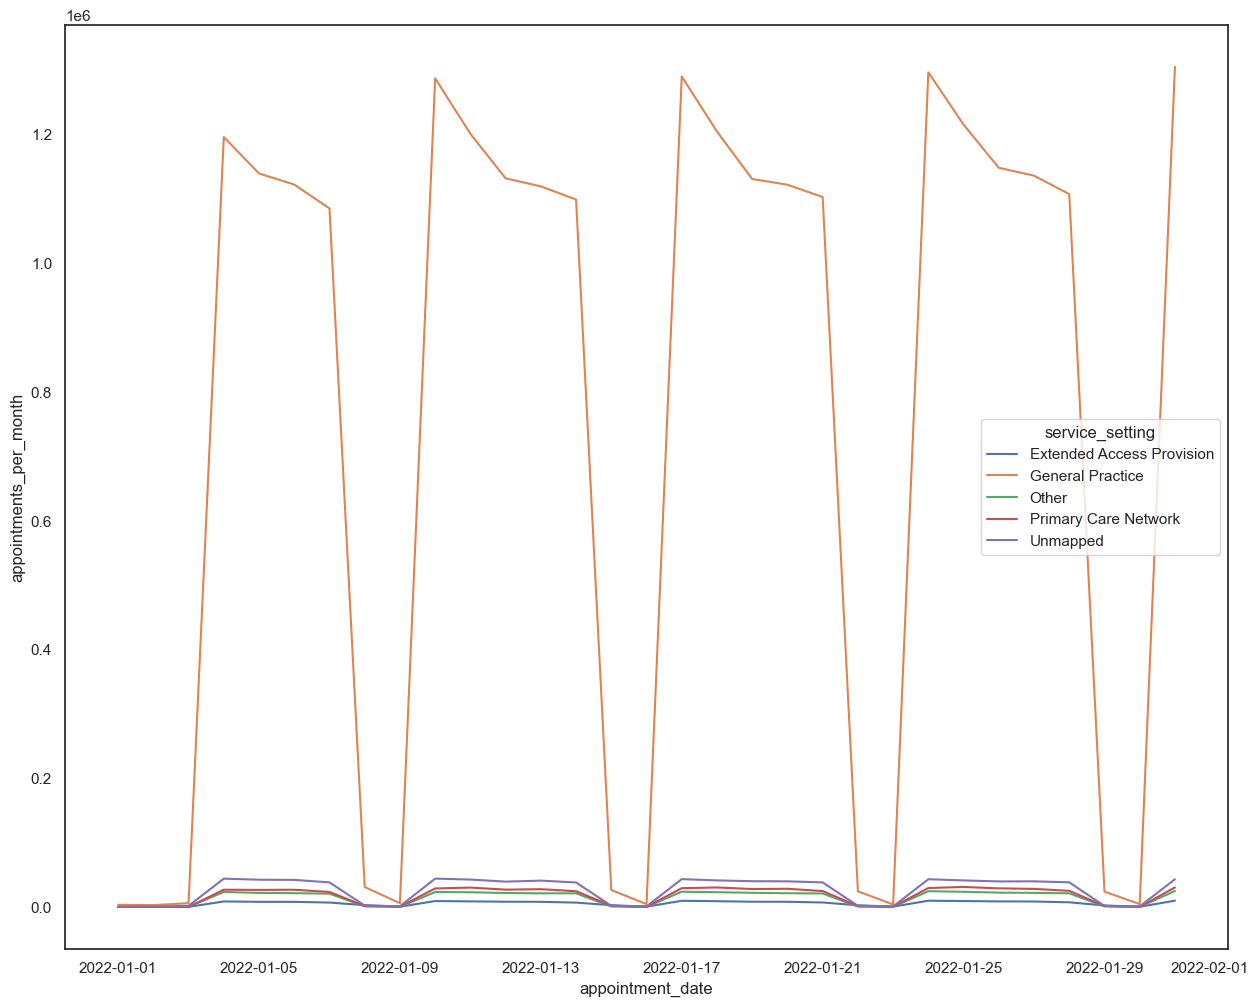

In [52]:
winter_ss = nc_ss_day[nc_ss_day['appointment_month'] == '2022-01']


sns.lineplot(x='appointment_date', y='appointments_per_month', 
                         hue='service_setting', data=winter_ss, ci=None)
plt.savefig('winter_ss.png', dpi=300)

**Spring (April 2022):**

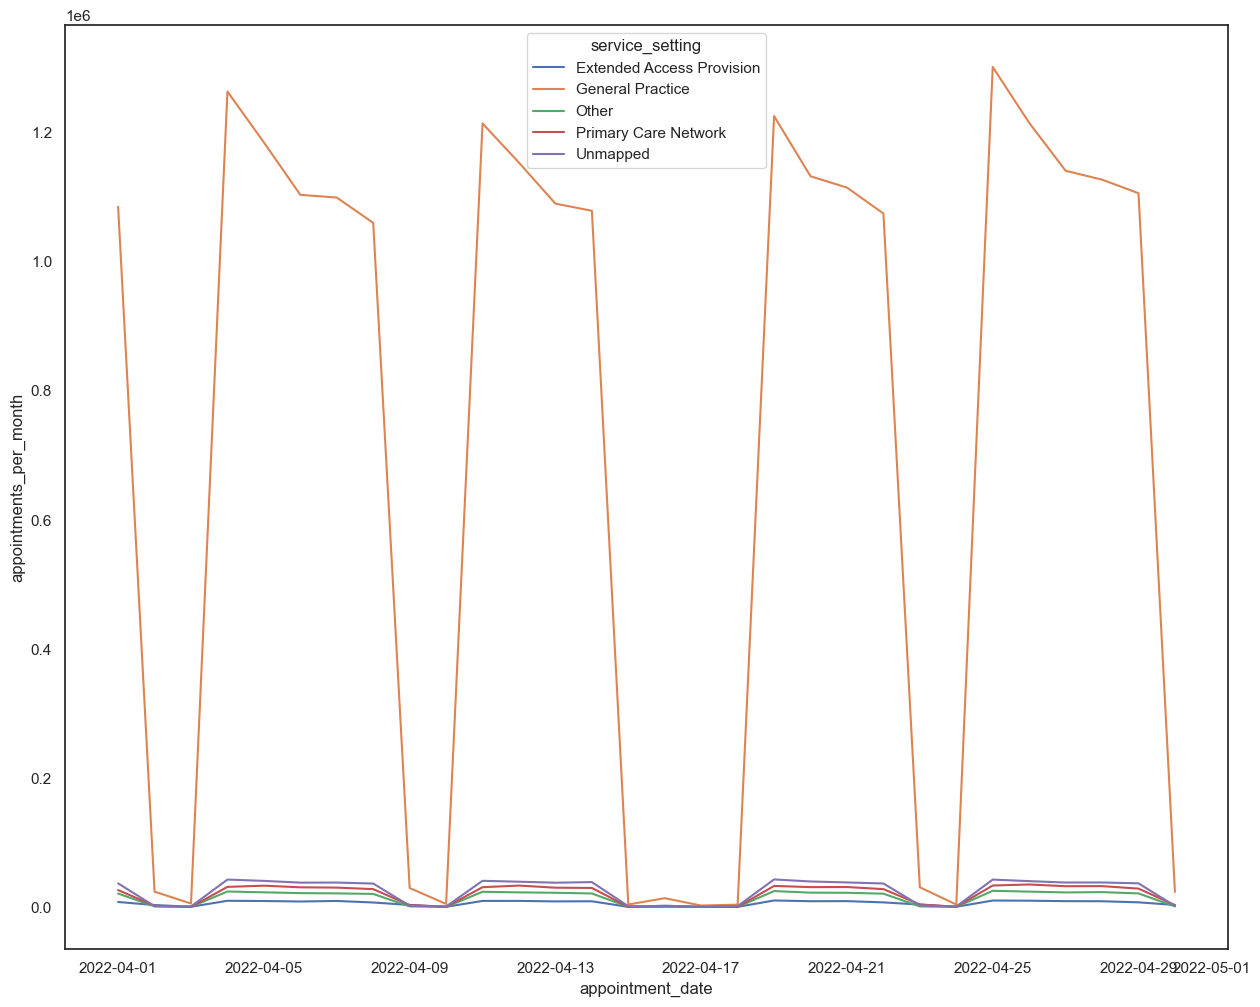

In [53]:
spring_ss = nc_ss_day[nc_ss_day['appointment_month'] == '2022-04']


sns.lineplot(x='appointment_date', y='appointments_per_month', 
                         hue='service_setting', data=spring_ss, ci=None)
plt.savefig('spring_ss.png', dpi=300)

**Information**

General Practice is the most provided service throuout the whole year. The number of appointments was on the rise during autumn season - from August to November 2021. Less people attended General Practice during Winter - December to February 2022. The number of appointments rose again in March 2022.

Context type of visists is mostly Care Related Encounter, however two remaining categories are Inconsistent Mapping and Unmapped. Perhaps this category could be divided at a more detailed/relevant level.

Looking at number of appointments per specific month, there is a notable weekly trend. Most of the appointments happen in the beggining of the week and drop consistently towards the end of the week. There is a very small number of appointments on the weekends.

# 

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [54]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(15, 12)})
sns.set_style('white')

pd.options.display.max_colwidth = 200

In [55]:
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [56]:
tweets.dtypes

tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object

In [57]:
print(tweets.columns)

Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')


In [58]:
tweets.isnull().sum()

tweet_id                     0
tweet_full_text              0
tweet_entities               0
tweet_entities_hashtags    167
tweet_metadata               0
tweet_retweet_count          0
tweet_favorite_count         0
tweet_favorited              0
tweet_retweeted              0
tweet_lang                   0
dtype: int64

In [59]:
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [60]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [61]:
tweets['tweet_retweet_count'].value_counts().sort_index()

0      526
1      215
2      114
3       70
4       27
5       35
6       12
7       18
8       15
9       13
10       5
11       6
12      16
13       1
14       1
15       1
16       2
19       1
20       1
23       2
24       2
35      10
37       6
39       1
40       1
41       3
44       4
48       1
49       1
53       5
54       1
57       1
62       3
63       4
68       3
72       2
73      14
76       3
78       2
79       1
85       3
107      1
150      4
169      1
207      3
208     12
303      1
Name: tweet_retweet_count, dtype: int64

In [62]:
tweets['tweet_favorite_count'].value_counts().sort_index()

0     1027
1       91
2       16
3       13
4        7
5        5
6        2
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
17       1
18       1
20       1
28       1
42       1
Name: tweet_favorite_count, dtype: int64

In [63]:
tweets_text = tweets[['tweet_full_text', 'tweet_entities', 
                      'tweet_entities_hashtags', 'tweet_metadata']]
tweets_text.head()

,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}"
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}"
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}"
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}"
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}"


In [64]:
tags = []

In [65]:
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            tags.append(z.lower())

In [66]:
tags_count = pd.Series(tags).value_counts()
print(tags_count.head(30))

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [67]:
data = pd.DataFrame(tags_count.reset_index())
data.columns = ['word', 'count']
data['count'] = data['count'].astype(int)
data.head()

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [68]:
# Two hashatgs are removed from the data: #healtcare and #health.
# They are generic entries based on the topic analyzed
# and are overrpreseted in the data.

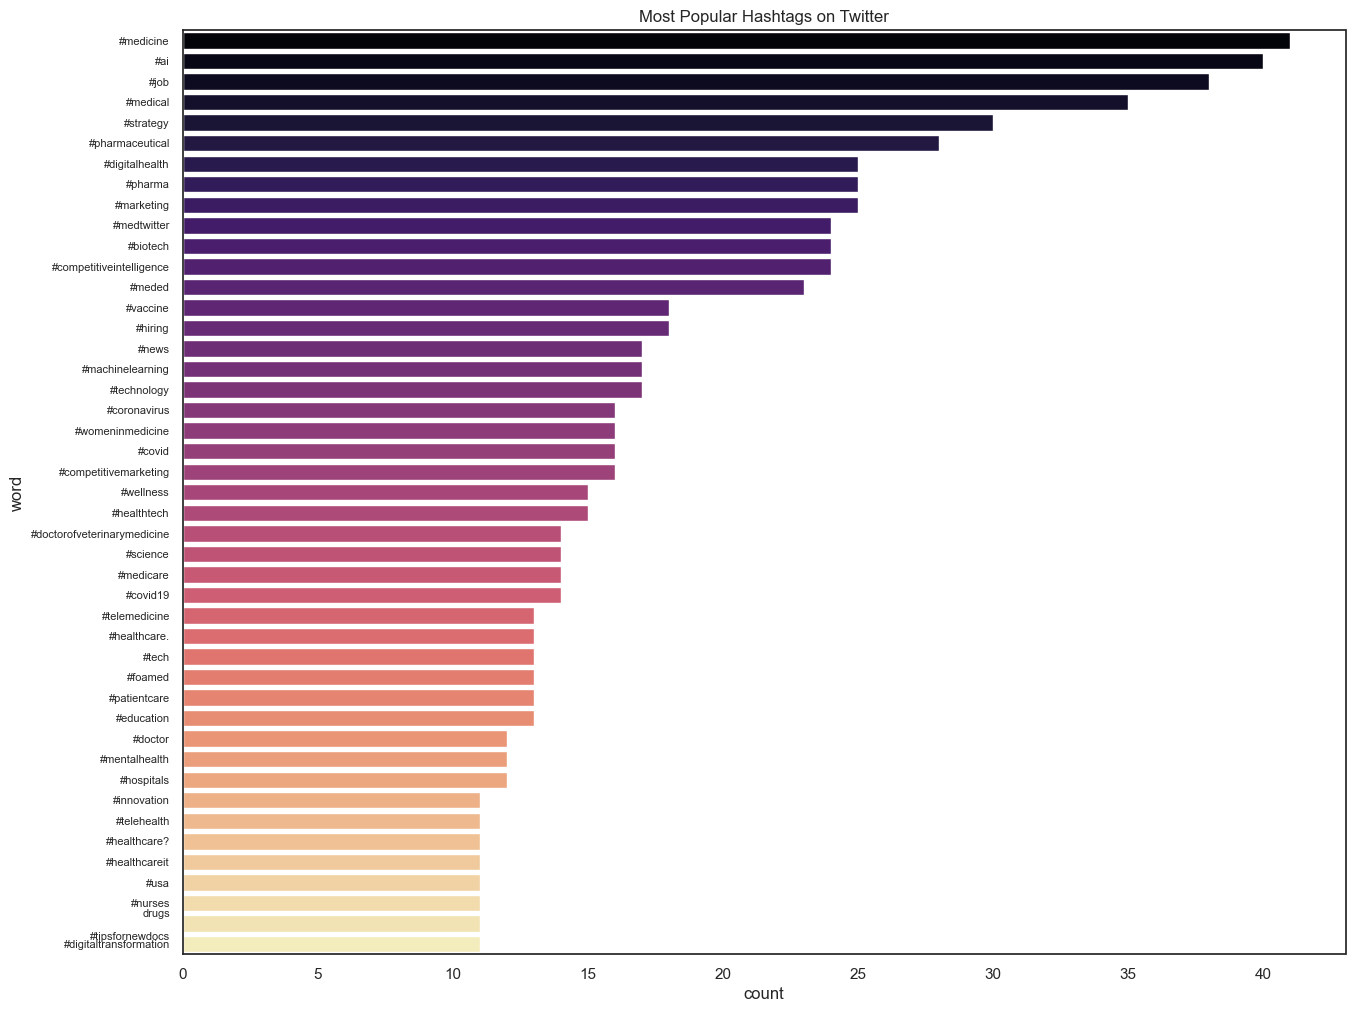

In [69]:
# Display records where the count is larger than 10 and lower than 60.
data_filtered = data[(data['count']>10) & (data['count']<60)]

sns.barplot(x='count', y='word', data=data_filtered, palette='magma')
plt.title('Most Popular Hashtags on Twitter')
plt.yticks(fontsize=8);
plt.show()

In [110]:
plt.savefig('MostPopularHashtagsOnTwitter')

<Figure size 1500x1200 with 0 Axes>

**Information**

There are 1,174 tweets in the dataset of which 167 do not use any hashtag.

As much as it might be useful to look at retweeted and favourite tweet messages, it might not be a full representation of the most important topics that concern people in social media. Some people might post equally important messages to those most popular but still might not be able to reach such a high following or popularity.
Nethertheless, it it worth looking at the most popular tweets to see how many people resonate with the same ideq or if actually opose it.

The most popular hashtags regarding NHS are generic words connected with healtcare. Excluding #healthcare and #health gives a clearer insight to trending topics. Based on these constrains, the most popular hashtags become #medicine, #ai and #job. You can also notice a lot of hashtags related to new technologies in medicine and digitalisation of the industry.
 

### Investigate the main cencerns posed by the NHS. 

In [71]:
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [72]:
print(ar['appointment_month'].min())
print(ar['appointment_month'].max())

2020-01
2022-06


In [73]:
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

In [74]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_subset = ar[ar['appointment_month']>= '2021-8']
ar_subset.head(10)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961
3657,E54000034,2021-08-01,Attended,GP,Face-to-Face,More than 28 Days,445
3658,E54000034,2021-08-01,Attended,GP,Face-to-Face,Same Day,40113
3659,E54000034,2021-08-01,Attended,GP,Face-to-Face,Unknown / Data Quality,15
3660,E54000034,2021-08-01,Attended,GP,Home Visit,1 Day,169
3661,E54000034,2021-08-01,Attended,GP,Home Visit,15 to 21 Days,3


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [75]:
ar_agg = ar_subset[['appointment_month', 'hcp_type', 'appointment_status', 
                   'appointment_mode', 'time_between_book_and_appointment', 'count_of_appointments']]
                   
ar_agg.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,2021-08-01,GP,Attended,Face-to-Face,1 Day,6553
3653,2021-08-01,GP,Attended,Face-to-Face,15 to 21 Days,2390
3654,2021-08-01,GP,Attended,Face-to-Face,2 to 7 Days,10547
3655,2021-08-01,GP,Attended,Face-to-Face,22 to 28 Days,937
3656,2021-08-01,GP,Attended,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...
596816,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17


In [76]:
ar_df = ar_subset.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
ar_df

,appointment_month,count_of_appointments
0,2021-08-01,23852171
1,2021-09-01,28522501
2,2021-10-01,30303834
3,2021-11-01,30405070
4,2021-12-01,25140776
5,2022-01-01,25635474
6,2022-02-01,25355260
7,2022-03-01,29595038
8,2022-04-01,23913060
9,2022-05-01,27495508


In [77]:
ar_df['utilisation'] = round(ar_df['count_of_appointments'] / 30, 1)
ar_df

# The NHS can accommodate a maximum of 1,200,000 appointments per day.

,appointment_month,count_of_appointments,utilisation
0,2021-08-01,23852171,795072.4
1,2021-09-01,28522501,950750.0
2,2021-10-01,30303834,1010127.8
3,2021-11-01,30405070,1013502.3
4,2021-12-01,25140776,838025.9
5,2022-01-01,25635474,854515.8
6,2022-02-01,25355260,845175.3
7,2022-03-01,29595038,986501.3
8,2022-04-01,23913060,797102.0
9,2022-05-01,27495508,916516.9


In [78]:
ar_df['appointment_month'] = ar_df['appointment_month'].dt.strftime('%Y-%m')

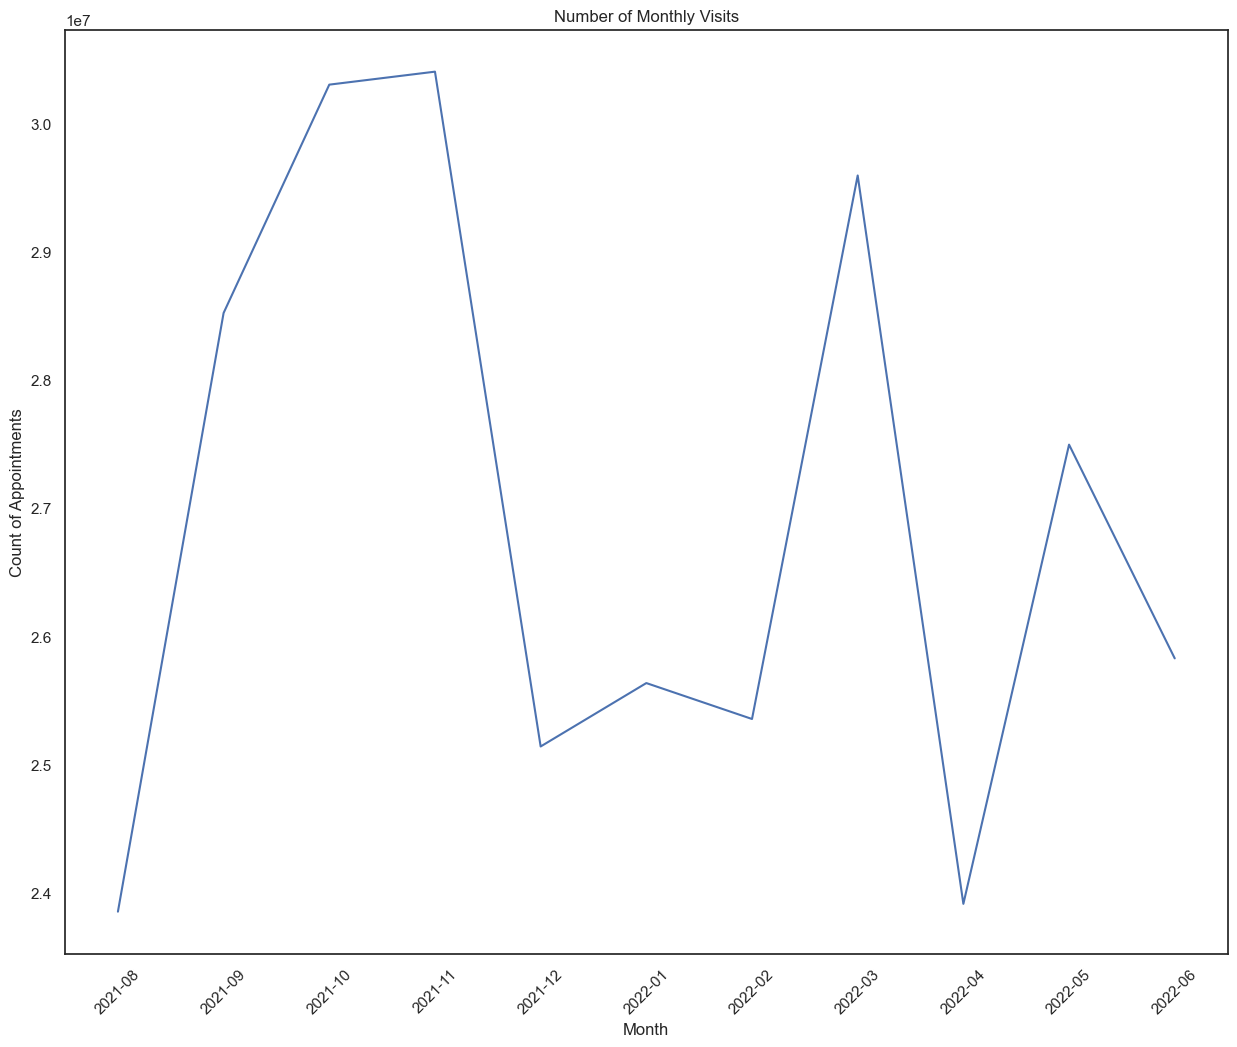

In [79]:
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_df)
plt.title('Number of Monthly Visits')
plt.xlabel('Month')
plt.ylabel('Count of Appointments')
plt.xticks(rotation=45)
plt.show()

In [80]:
plt.savefig('Number of Monthly Visits.jpg')

<Figure size 1500x1200 with 0 Axes>

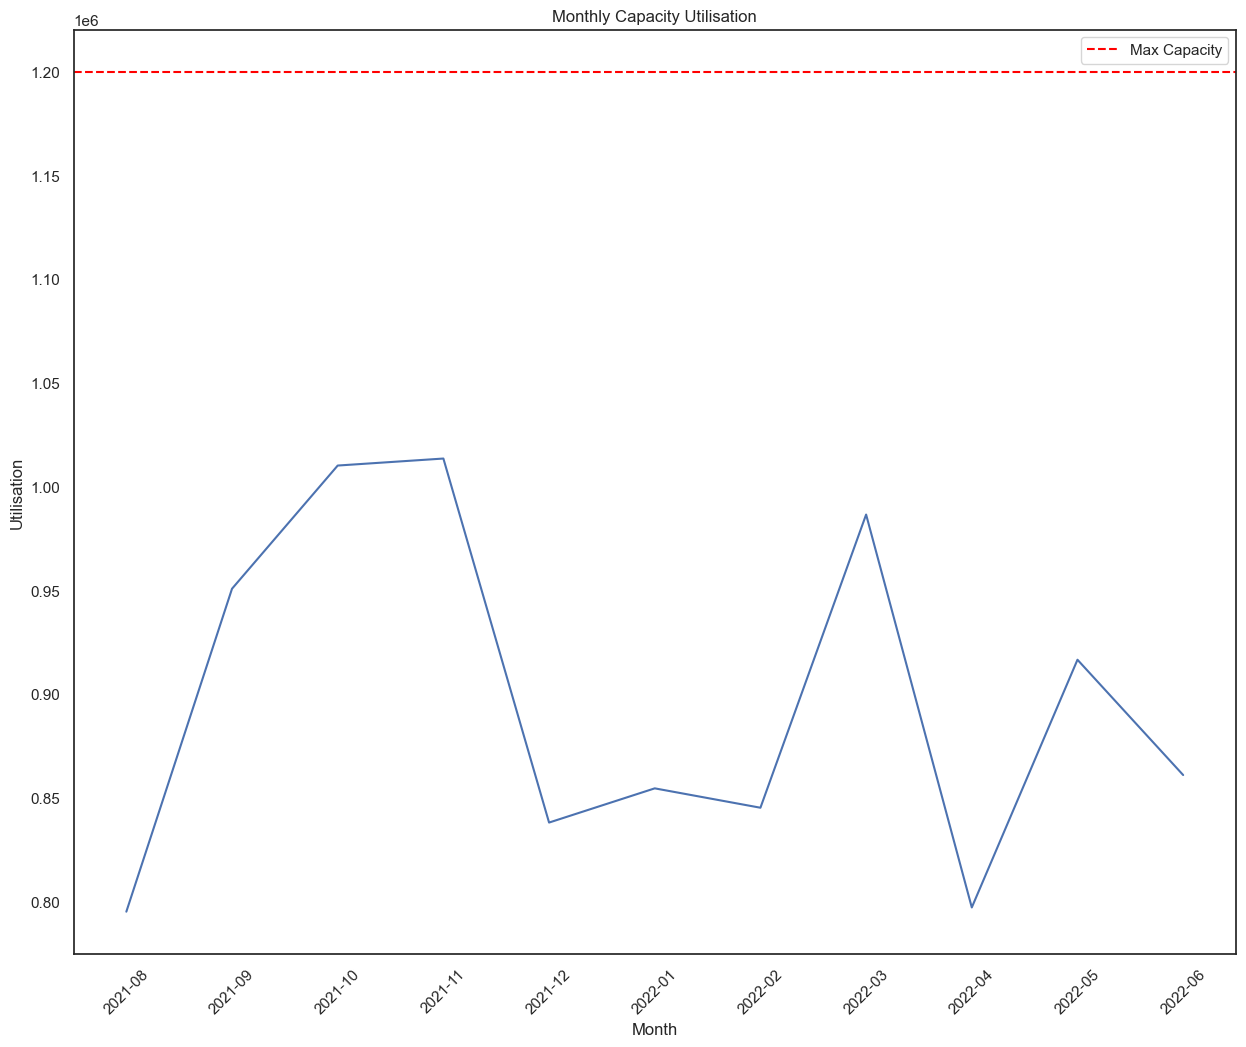

In [81]:
sns.lineplot(x='appointment_month', y='utilisation', data=ar_df)
plt.title('Monthly Capacity Utilisation')
plt.xlabel('Month')
plt.ylabel('Utilisation')
plt.xticks(rotation=45)
plt.axhline(y=1200000, color='red', linestyle='--', label='Max Capacity')
plt.legend()
plt.show()

In [82]:
plt.savefig('Monthly Capacity Utilisation.jpg')

<Figure size 1500x1200 with 0 Axes>

**Question 2:** How do the healthcare professional types differ over time?

In [83]:
ar_agg1 = ar_agg.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()
ar_agg1.head()

,appointment_month,hcp_type,count_of_appointments
0,2021-08-01,GP,12299022
1,2021-08-01,Other Practice staff,10797821
2,2021-08-01,Unknown,755328
3,2021-09-01,GP,14487785
4,2021-09-01,Other Practice staff,13126731


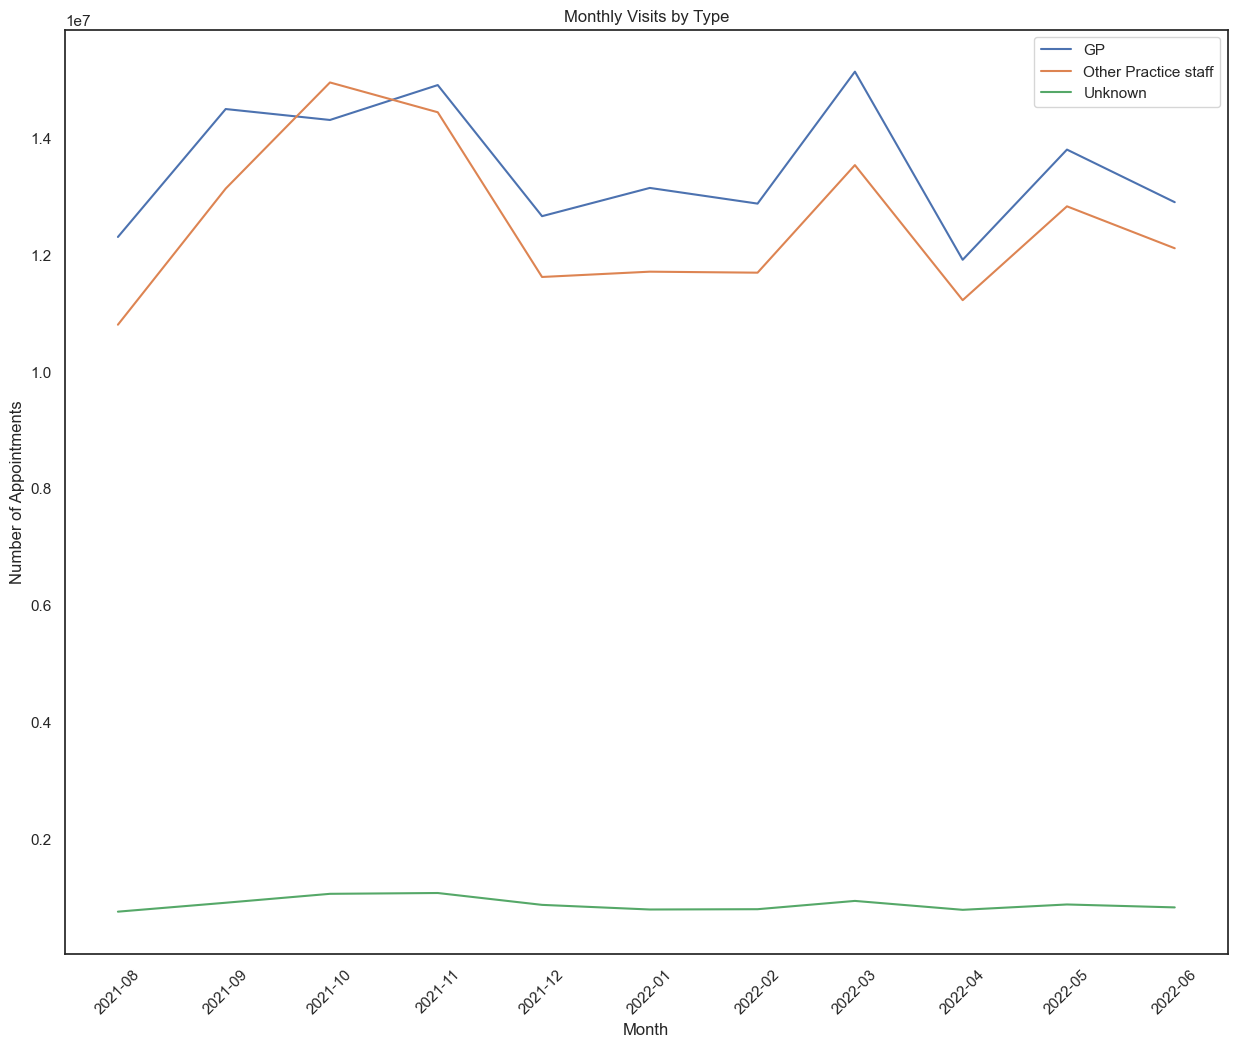

In [84]:
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg1, hue='hcp_type', ci=None)
plt.title('Monthly Visits by Type')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [85]:
plt.savefig('Monthly Visits by Type.jpg')

<Figure size 1500x1200 with 0 Axes>

**Question 3:** Are there significant changes in whether or not visits are attended?

In [86]:
ar_agg2 = ar_agg.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()
ar_agg2.head()

,appointment_month,appointment_status,count_of_appointments
0,2021-08-01,Attended,22081765
1,2021-08-01,DNA,949137
2,2021-08-01,Unknown,821269
3,2021-09-01,Attended,25757066
4,2021-09-01,DNA,1321348


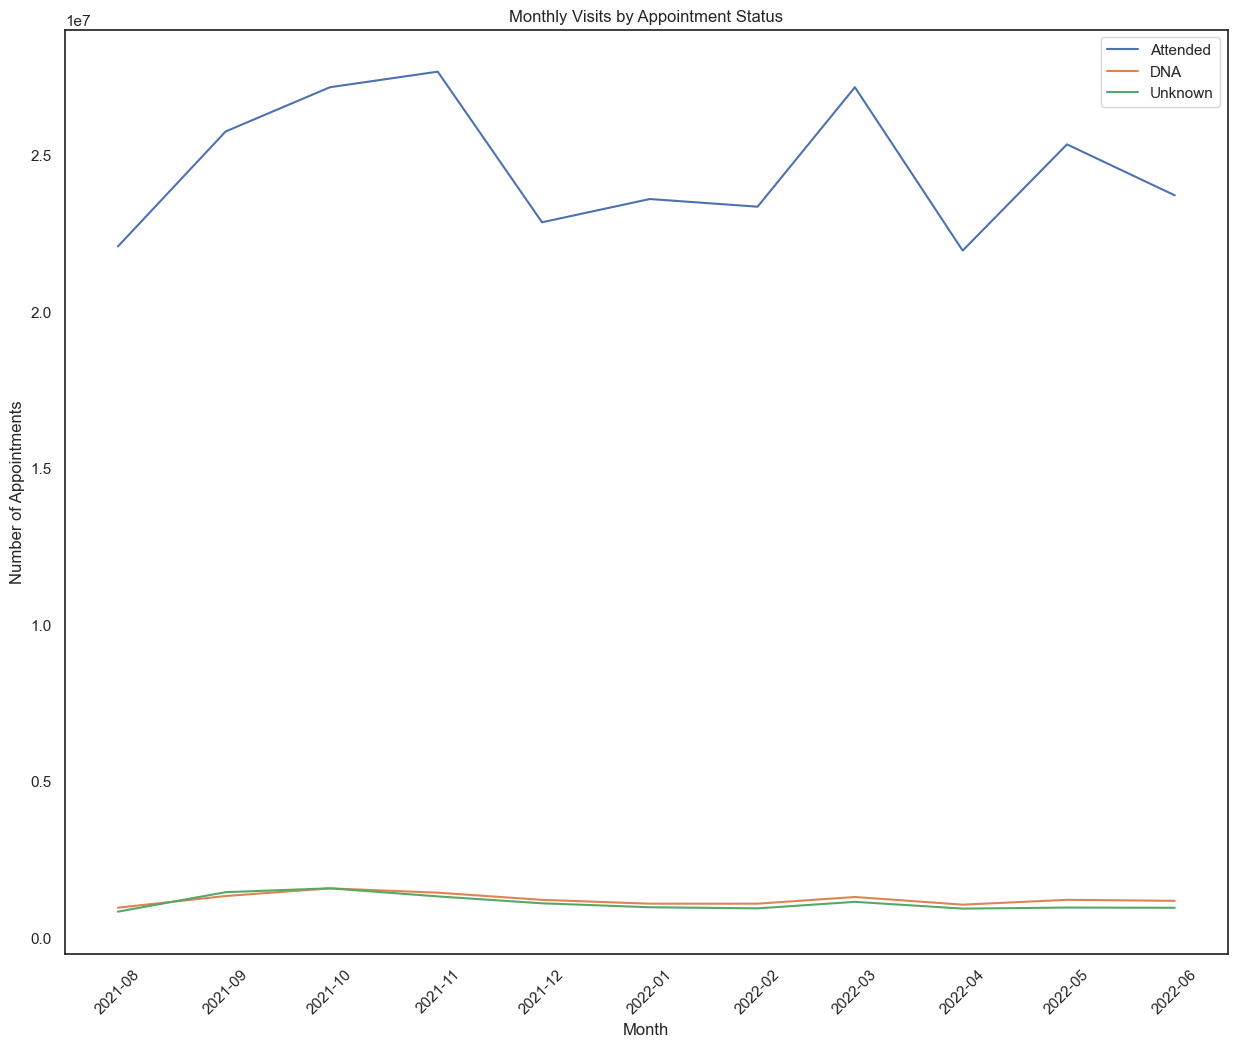

In [87]:
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg2, hue='appointment_status', ci=None)
plt.title('Monthly Visits by Appointment Status')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [88]:
plt.savefig('Monthly Visits by Appointment Status.jpg')

<Figure size 1500x1200 with 0 Axes>

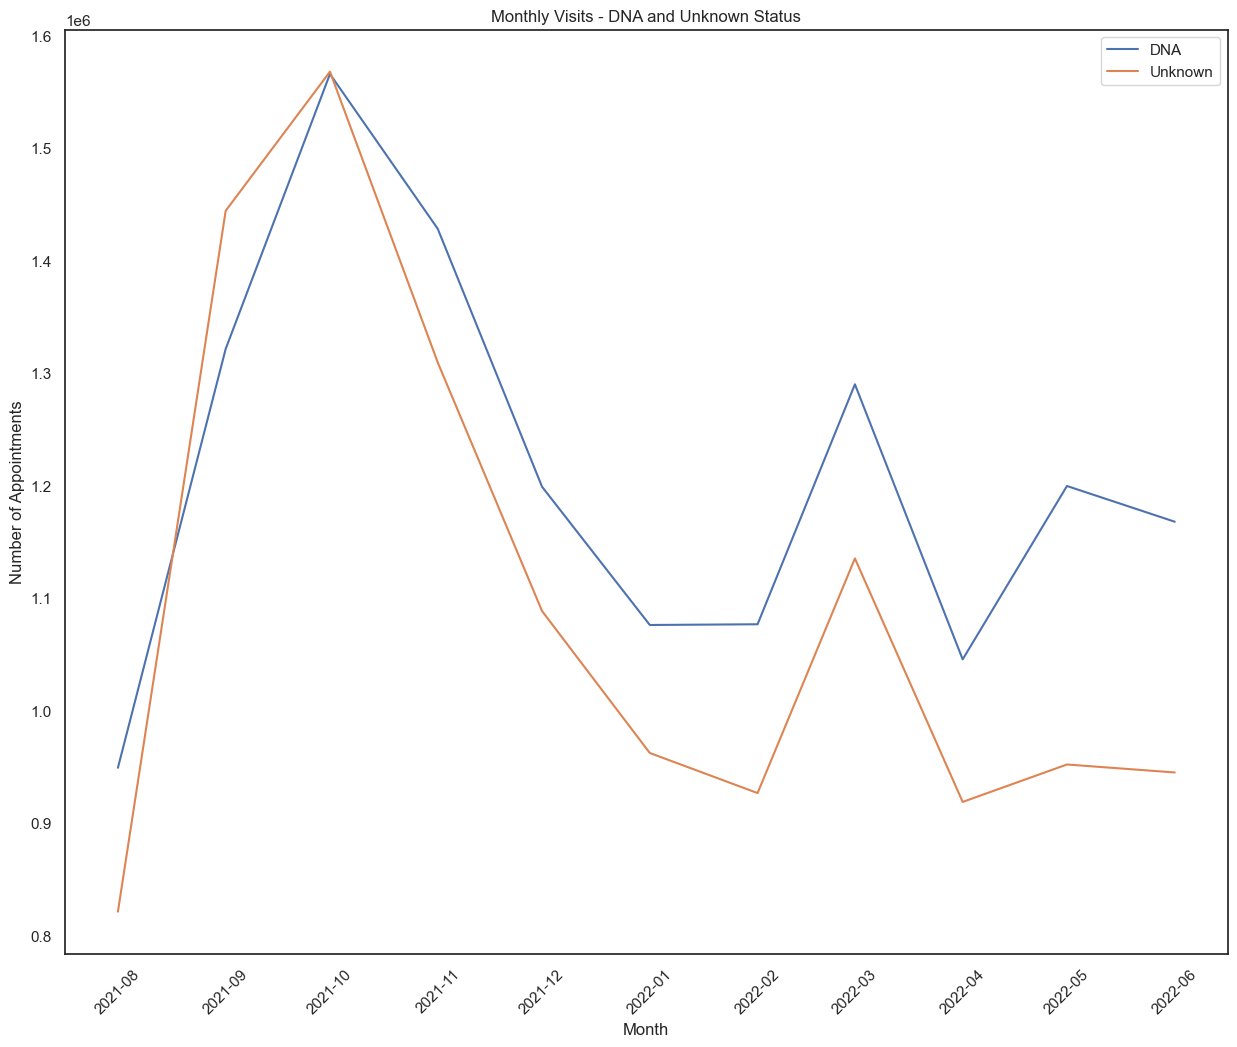

In [89]:
exc = ['Attended']
not_attended = ar_agg2[~ar_agg2['appointment_status'].isin(exc)]

sns.lineplot(x='appointment_month', y='count_of_appointments', data=not_attended, hue='appointment_status', ci=None)
plt.title('Monthly Visits - DNA and Unknown Status')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [90]:
plt.savefig('Monthly Visits - DNA and Unknown Status.jpg')

<Figure size 1500x1200 with 0 Axes>

**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [91]:
ar_agg3 = ar_agg.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()
ar_agg3.head()

,appointment_month,appointment_mode,count_of_appointments
0,2021-08-01,Face-to-Face,13717325
1,2021-08-01,Home Visit,151619
2,2021-08-01,Telephone,9149072
3,2021-08-01,Unknown,724126
4,2021-08-01,Video/Online,110029


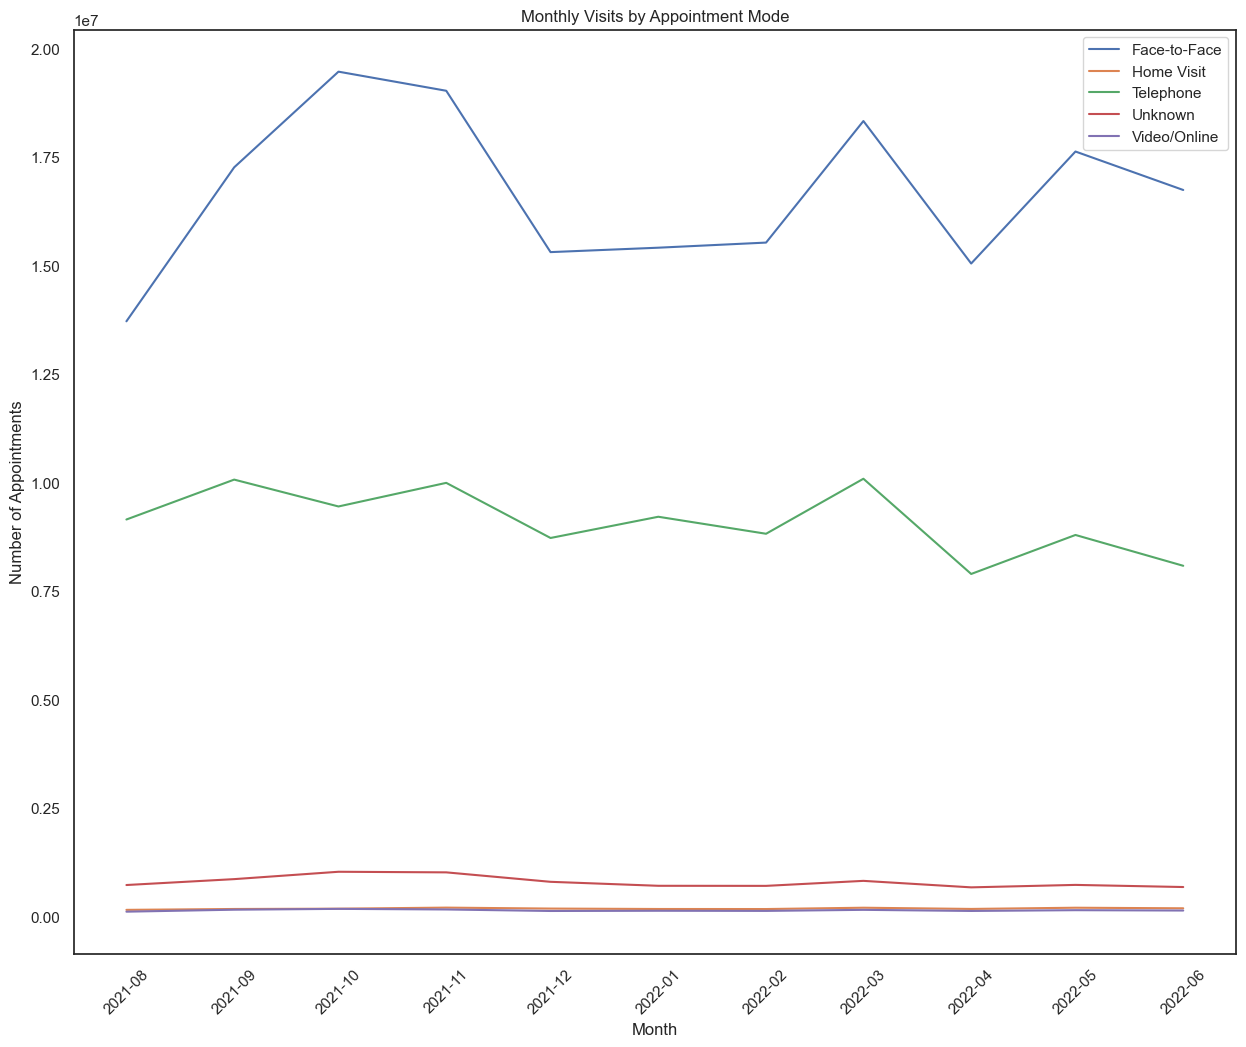

In [92]:
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg3, hue='appointment_mode', ci=None)
plt.title('Monthly Visits by Appointment Mode')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [93]:
plt.savefig('Monthly Visits by Appointment Mode.jpg')

<Figure size 1500x1200 with 0 Axes>

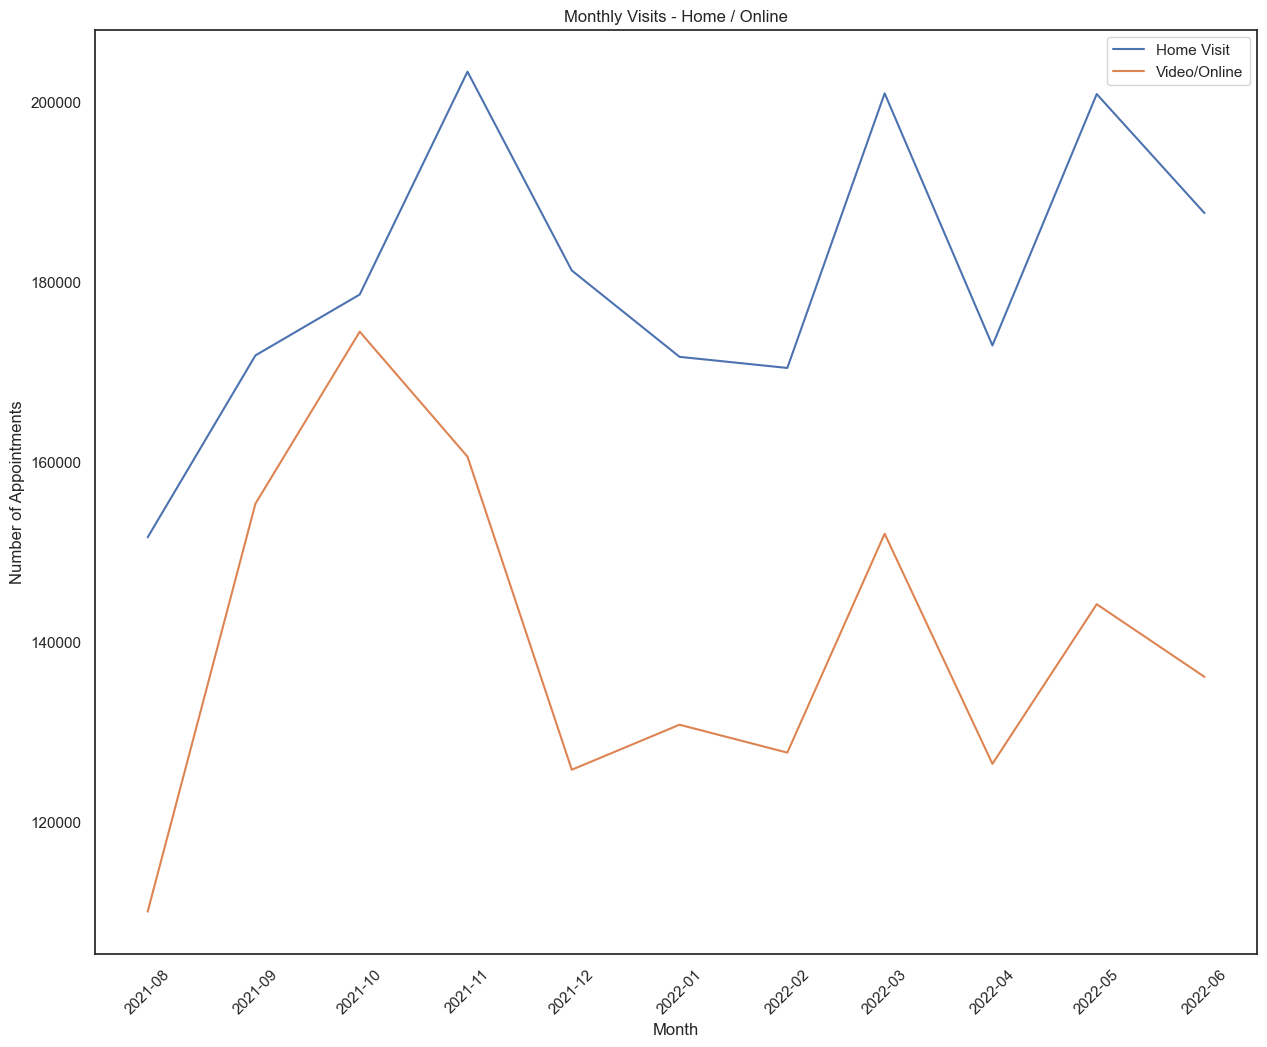

In [94]:
exc_2 = ['Face-to-Face', 'Telephone', 'Unknown']
no_fnt = ar_agg3[~ar_agg3['appointment_mode'].isin(exc_2)]

sns.lineplot(x='appointment_month', y='count_of_appointments', data=no_fnt, hue='appointment_mode', ci=None)
plt.title('Monthly Visits - Home / Online')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [95]:
plt.savefig('Monthly Visits - Home_Online.jpg')

<Figure size 1500x1200 with 0 Axes>

**Question 5:** Are there any trends in time between booking an appointment?

In [96]:
ar_agg4 = ar_agg.groupby(['appointment_month', 'time_between_book_and_appointment'])\
                        ['count_of_appointments'].sum().reset_index()
ar_agg4.head()

,appointment_month,time_between_book_and_appointment,count_of_appointments
0,2021-08-01,1 Day,2018319
1,2021-08-01,15 to 21 Days,1453209
2,2021-08-01,2 to 7 Days,4924960
3,2021-08-01,22 to 28 Days,828866
4,2021-08-01,8 to 14 Days,2889150


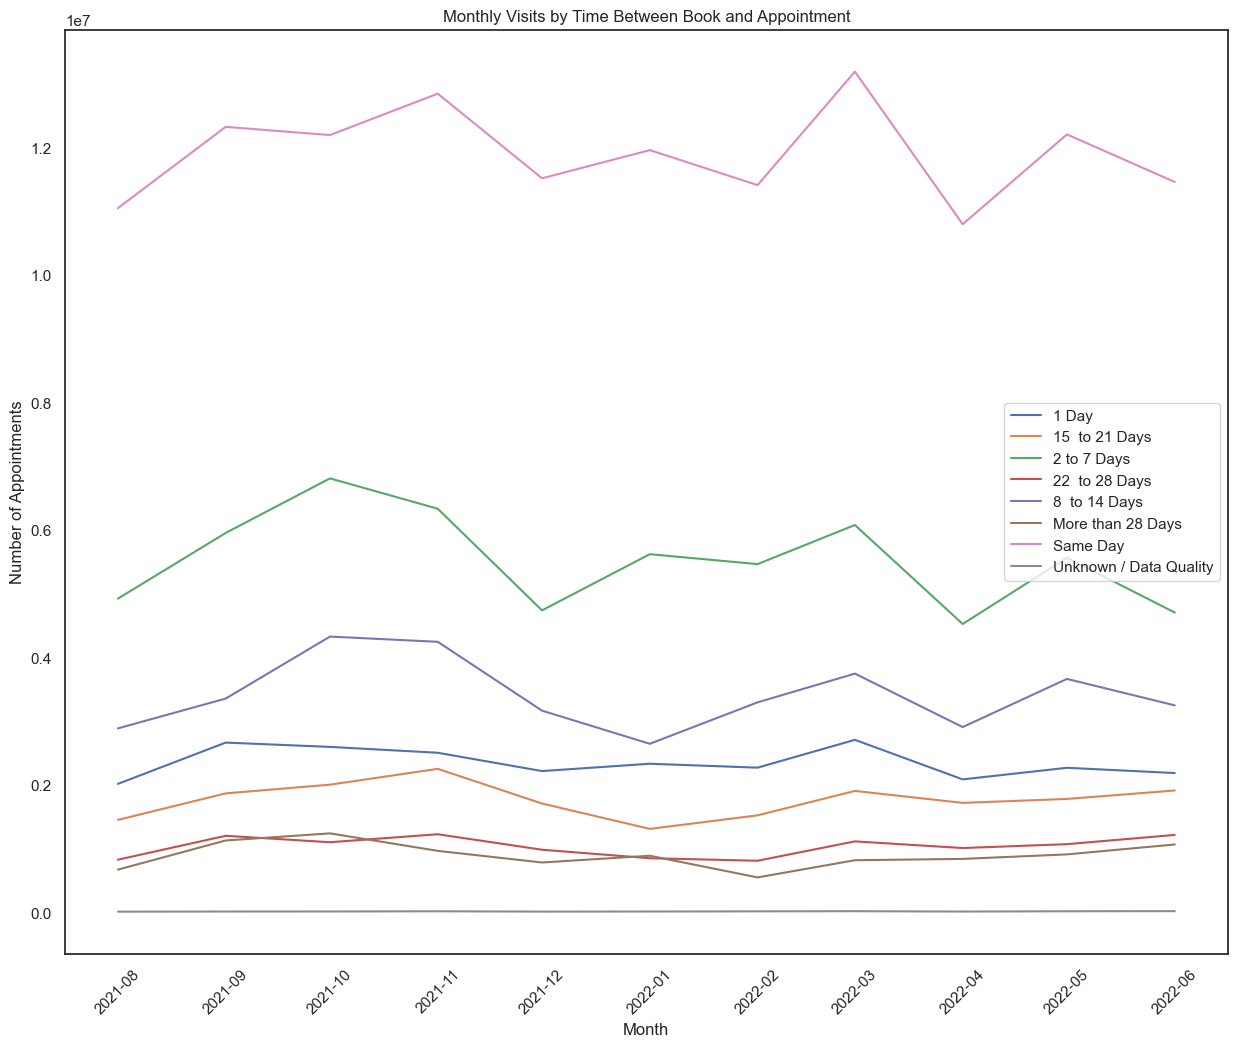

In [97]:
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg4,
             hue='time_between_book_and_appointment', ci=None)
plt.title('Monthly Visits by Time Between Book and Appointment')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [98]:
plt.savefig('Monthly Visits by Time Between Book and Appointment.jpg')

<Figure size 1500x1200 with 0 Axes>

**Question 6:** How do the spread of service settings compare?

In [99]:
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [100]:
nc_new = nc[['appointment_month', 'service_setting', 'count_of_appointments']]
nc_new.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Primary Care Network,3
1,2021-08,Other,7
2,2021-08,General Practice,79
3,2021-08,General Practice,725
4,2021-08,General Practice,2


In [101]:
nc_new2 = nc_new.groupby(['appointment_month', 'service_setting'])\
                        ['count_of_appointments'].sum().reset_index()
nc_new2.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


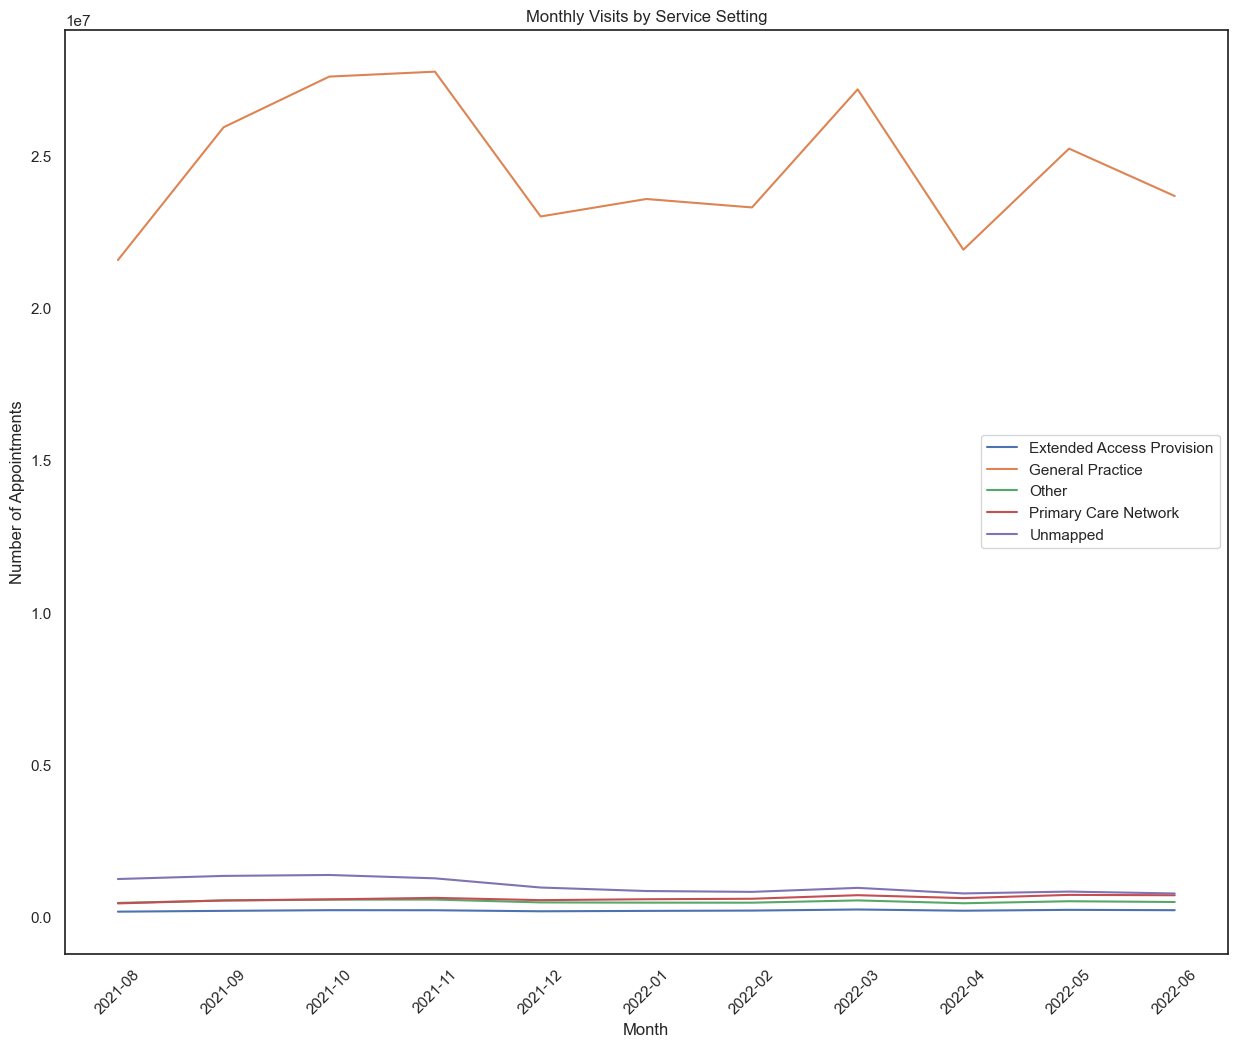

In [102]:
sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_new2, hue='service_setting', ci=None)
plt.title('Monthly Visits by Service Setting')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [103]:
plt.savefig('Monthly Visits by Service Setting.jpg')

<Figure size 1500x1200 with 0 Axes>

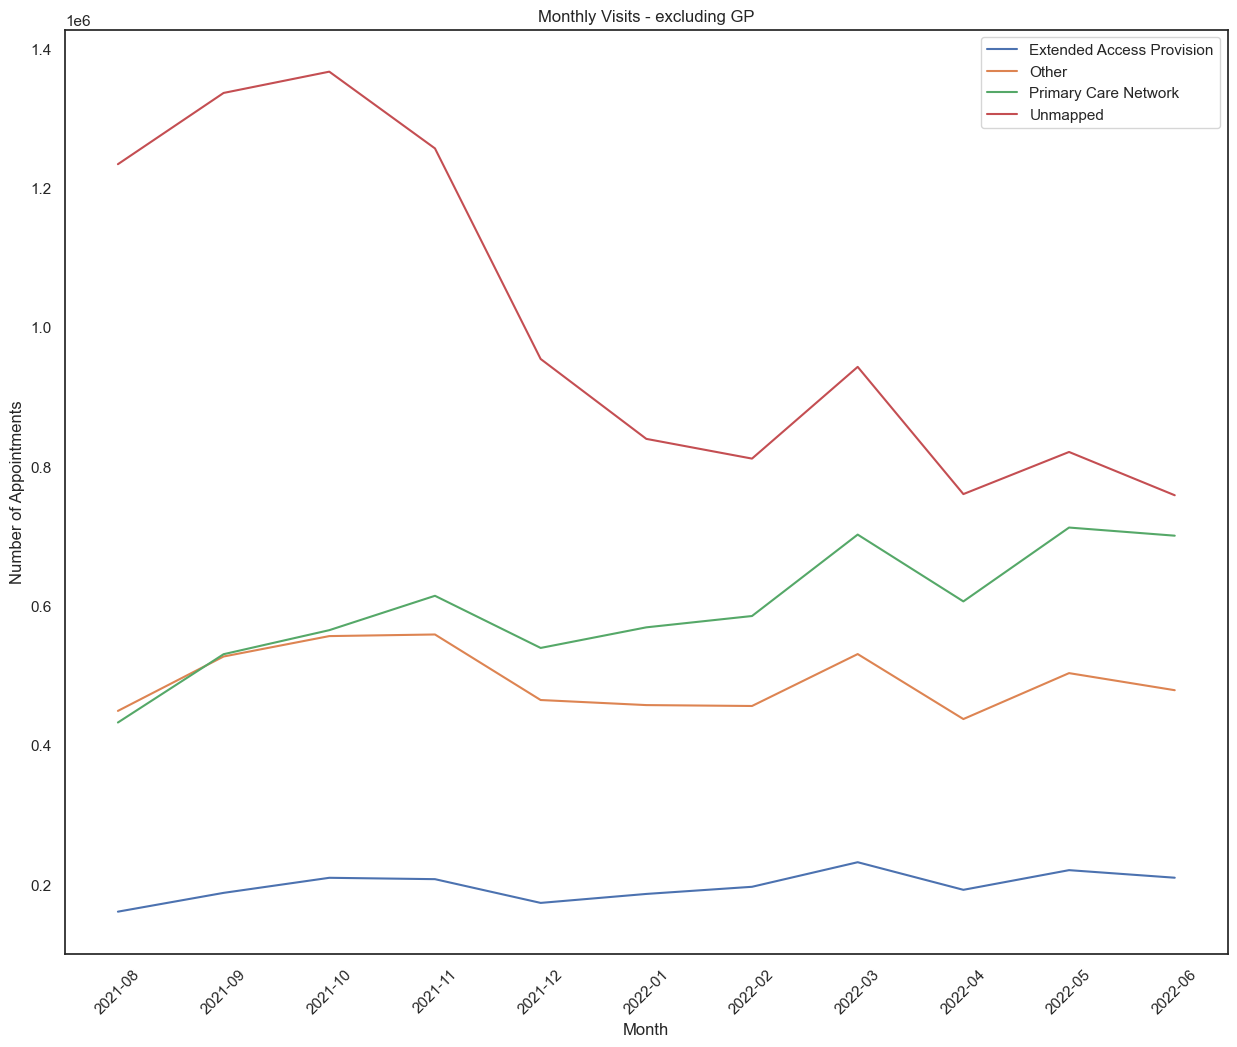

In [104]:
exc_3 = ['General Practice']
no_gp = nc_new2[~nc_new2['service_setting'].isin(exc_3)]

sns.lineplot(x='appointment_month', y='count_of_appointments', data=no_gp, hue='service_setting', ci=None)
plt.title('Monthly Visits - excluding GP')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [105]:
plt.savefig('Monthly Visits - excluding GP.jpg')

<Figure size 1500x1200 with 0 Axes>

# 

### Provide a summary of your findings and recommendations based on the analysis.

> Summary

During the period between 2021-08 and 2022-06, there is a notable sesionality in number of appointments. There is a sharp rise in September 2021 throught the next two months. The autumn season shows a higher demand for a visit at NHS. The beginning of spring is also a busier season with a sharp rise in number of visits in March 2022.

The NHS has a current capacity of visits it can attend per day. With a maximum capaity of 1,2 mln visits, there is still a room of around 150,000 visit a day in the busiest season. It shows that there is an adequete amount of staff.

General Practice is the most popular service. Most patietens attend their appointments, however there are still some that miss them. The trend of not attended appointments follow a seasonal trend of total appointments. 

Most of the visits are face-to-face. Thelephone consultations are held in a number of around 10 mln. They do not follow seasonal trends and remain flat in value throughout the analysed period. In the busiest periods video / online consultation seem to gain more interest as their count rise faster in comparison to the remaining appointment modes. Home visits take longer to attend. The rise in number of visits is slower than the total.

Time between booking and appointment can vary from the same day visit to more than 28 days of waiting time. The majority of visists is attended the same day, however a great number is attended from 2 to 14 days from the moment of booking.

The most popular hashtags regarding NHS are generic words connected with healtcare. Excluding the two most popular - #healthcare and #health - gives a clearer insight to trending topics. The trending hashtags are a.i. #medicine, #ai and #job, as well as hashtags related to new technologies in medicine and digitalisation of the industry.


*What possible recommendations does the data provide for the NHS?*

Possible recommendations for the NHS to consider are:
- As long as it is possible, attending a higher number of patiens on video and online consultation. Whenever there is a higher demand in NHS service, video and online quickly gain a high interest as a mode of visit. Attending an appointment from a comfort of one's own home or any other other may decrease a number of unattended visits.
- A significant amount of visist is attended a few days after the booking. A confirmation of the visit a day ahead should be implemented with a possibility of cancelling the appointment. This way both sides are aware of the arrangement. In a case of cancellation, an additional space to attend a different patient the same day / 1 Day before is created. The analysis of the staff capacity show that such a solution could be implemented. 
- The most popular topics on social media (Twitter) regarding NHS discuss also new technologies, AI and digitalisation of the industry. Investment in digital infrastructure and standarisation standardisation of the processes across the whole country would save on costs in the future, imporve processes and data collection (which now is very imperfect as we see from the data provided).
